<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/classifiers/classifiers_including_vision_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
!pip install vit-pytorch
#!pip install -q torchinfo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [ ]:

import torch
from torch import nn
#from torchinfo import summary

In [ ]:
!gdown --id '10RHgTtoX-Db-dE8MRxJYSgwCzhauzvu1'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=10RHgTtoX-Db-dE8MRxJYSgwCzhauzvu1
From (redirected): https://drive.google.com/uc?id=10RHgTtoX-Db-dE8MRxJYSgwCzhauzvu1&confirm=t&uuid=6f1194bb-880a-46d7-a73d-1ef31c9babba
To: /content/rice.zip
100% 34.6M/34.6M [00:01<00:00, 24.8MB/s]


In [ ]:
!unzip /content/rice.zip -d /content/

Archive:  /content/rice.zip
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0378.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0379.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0380.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0381.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0382.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0383.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0384.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0385.jpg  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0386.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0388.JPG  
  inflating: /content/rice_leaf_diseases/Bacterial leaf blight/DSC_0389.JPG  
  inflating: /content/rice_leaf_dise

In [ ]:
import os

In [ ]:
dataset_path="/content/rice_leaf_diseases/"
classes=os.listdir(dataset_path)


In [ ]:





import numpy as np
import pandas as pd

def get_img_df_path(dataset_path, classes):
  df=pd.DataFrame(columns=["img_paths","classes"])

  i = 0
  for c in classes:
    image_path=os.path.join(dataset_path,c)
    paths = os.listdir(image_path)
    for path in paths:
      path_to_img=os.path.join(image_path,path)
      df.loc[len(df.index)]=[path_to_img,c]


  return df

In [ ]:
df=get_img_df_path(dataset_path,classes)
print(df["img_paths"][0])

/content/rice_leaf_diseases/Bacterial leaf blight/DSC_0397.JPG


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["img_paths"],df["classes"], test_size=0.20, random_state=42,stratify=df["classes"])




In [ ]:
import shutil
def move_files(new_p,paths,classes):
  if os.path.exists(new_p)==False:
    os.mkdir(new_p)

  for index,path in enumerate(paths):
    new_path=f"/content/{new_p}/{classes[index]}/"
    if os.path.exists(new_path)==False:
      os.mkdir(new_path)
    shutil.move(path,f"{new_path}" )

move_files("train",X_train.values,y_train.values)
move_files("test",X_test.values,y_test.values)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = ImageFolder(root='train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = ImageFolder(root='test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = trainset.classes
classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
import pandas as pd
import torchvision.models as models
df=pd.DataFrame(columns=["Name","Accuracy","Recall","Precision","F1","TrainingTime"])
df.head()

,Name,Accuracy,Recall,Precision,F1,TrainingTime


In [ ]:
import tqdm
from sklearn.metrics import recall_score, precision_score, f1_score,accuracy_score,confusion_matrix
import seaborn as sns
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import RocCurveDisplay



def plot_cm(actuals,predicteds):
  global classes
  cm = confusion_matrix(actuals, predicteds)
  sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=classes, yticklabels=classes)
  plt.ylabel('Prediction',fontsize=12)
  plt.xlabel('Actual',fontsize=12)
  plt.title('Confusion Matrix',fontsize=16)
  plt.show()
def train_test_model(model,name,edf,trainloader,testloader,epochs=100,):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  model=model.to(device)
  each_epochs_loss=[]



  print(f"{name} traning started.")
  start = time.time()
  for epoch in tqdm.tqdm(range(epochs)):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #running_loss += loss.item()
  end=time.time()
  print()
  print('Testing started.')

  actuals=[]
  predicteds=[]
  all_predictions=[]
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          images=images.to(device)
          labels=labels.to(device)
          outputs = model(images)

          probabilities = torch.nn.functional.softmax(outputs, dim=1)
          all_predictions=all_predictions+list(probabilities.cpu().numpy())

          _, predicted = torch.max(outputs.data, 1)
          actuals=actuals+list(labels.cpu().detach().numpy())

          predicteds=predicteds+list(predicted.cpu().detach().numpy())
  plot_cm(actuals,predicteds)

  accuracy=accuracy_score(actuals,predicteds)
  f1=f1_score(actuals,predicteds,average='macro')
  recall=recall_score(actuals,predicteds,average='macro')
  precision=precision_score(actuals,predicteds,average='macro')
  df.loc[len(edf.index)]=[name,accuracy,recall,precision,f1,end-start]

  y_test_bin = label_binarize(actuals, classes=np.arange(len(classes)))
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(classes)):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], np.array(all_predictions)[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  for i in range(len(classes)):
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()
  return edf


VIT traning started.


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 100/100 [03:49<00:00,  2.29s/it]


Testing started.


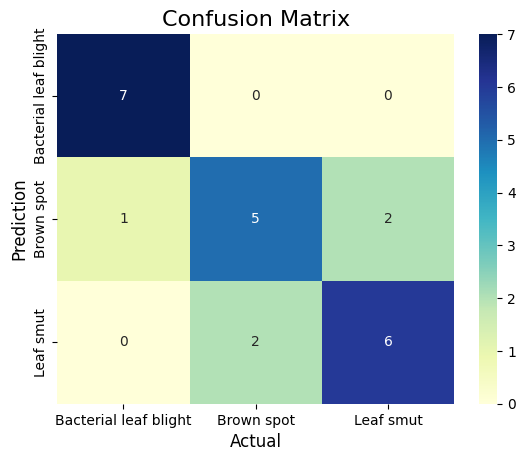

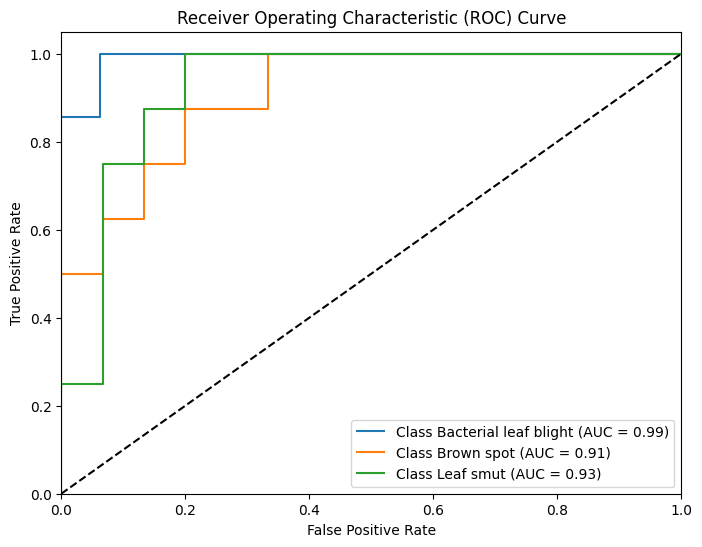

,Name,Accuracy,Recall,Precision,F1,TrainingTime
0,VIT,0.782609,0.791667,0.779762,0.783333,229.498509


In [ ]:
from vit_pytorch import SimpleViT
epochs=100
vit = SimpleViT(
    image_size = 224,
    patch_size = 32,
    num_classes = len(classes),
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048
)
df=train_test_model(vit,"VIT",df,trainloader,testloader,epochs)
df.head()

/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Googlenet traning started.


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 100/100 [03:59<00:00,  2.39s/it]


Testing started.


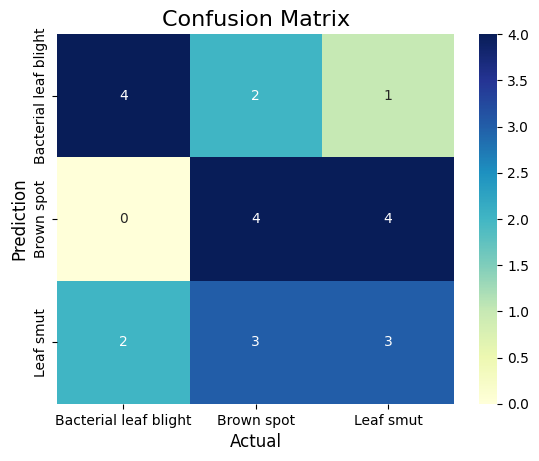

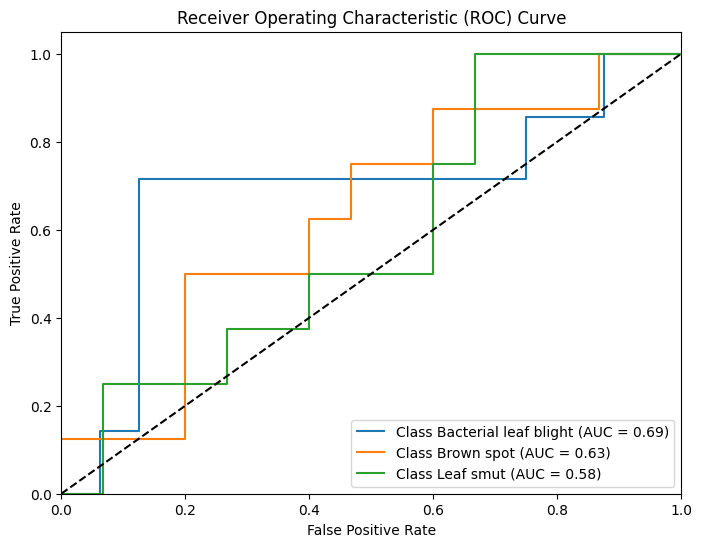

,Name,Accuracy,Recall,Precision,F1,TrainingTime
0,VIT,0.782609,0.791667,0.779762,0.783333,229.498509
1,Googlenet,0.478261,0.482143,0.495370,0.486991,239.299013


In [ ]:

googlenet = models.googlenet()
googlenet.aux_logits=False
num_ftrs = googlenet.fc.in_features
googlenet.fc = nn.Linear(num_ftrs, len(classes))
df=train_test_model(googlenet,"Googlenet",df,trainloader,testloader,epochs)
df.head()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG16 traning started.


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 100/100 [04:18<00:00,  2.58s/it]


Testing started.


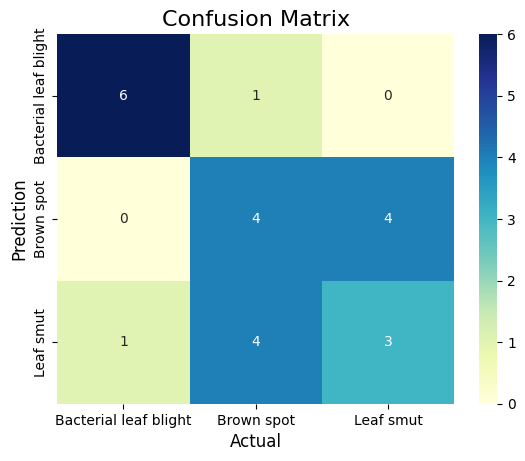

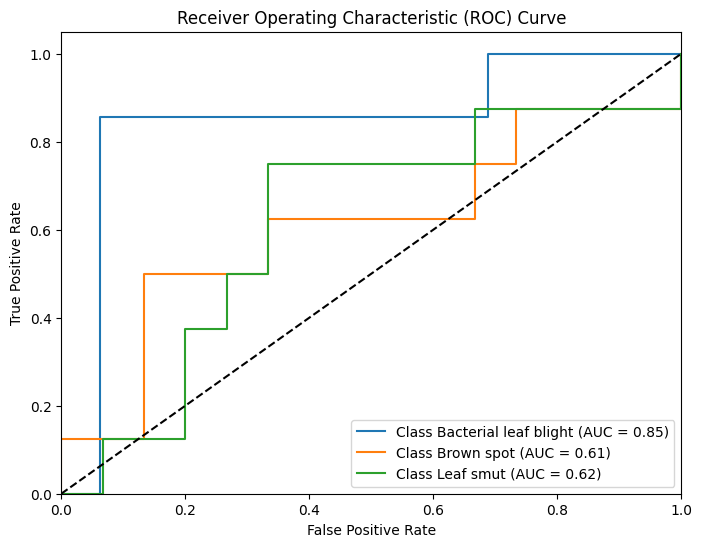

,Name,Accuracy,Recall,Precision,F1,TrainingTime
0,VIT,0.782609,0.791667,0.779762,0.783333,229.498509
1,Googlenet,0.478261,0.482143,0.495370,0.486991,239.299013
2,VGG16,0.565217,0.577381,0.576720,0.575910,258.398840


In [ ]:
import torchvision.models as models
vgg = models.vgg16(pretrained=False)
vgg.classifier[6] = nn.Linear(4096, len(classes))
df=train_test_model(vgg,"VGG16",df,trainloader,testloader,epochs)
df.head()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Alexnet traning started.


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 100/100 [03:26<00:00,  2.06s/it]


Testing started.


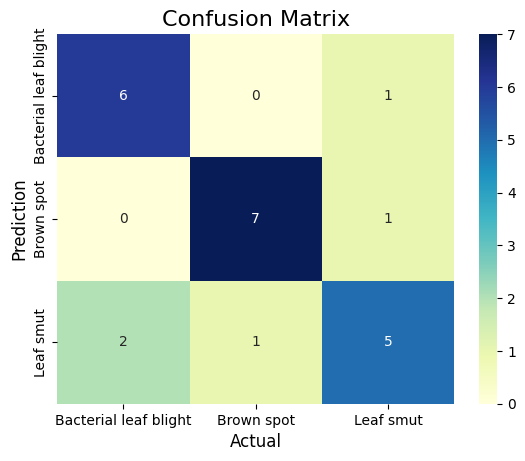

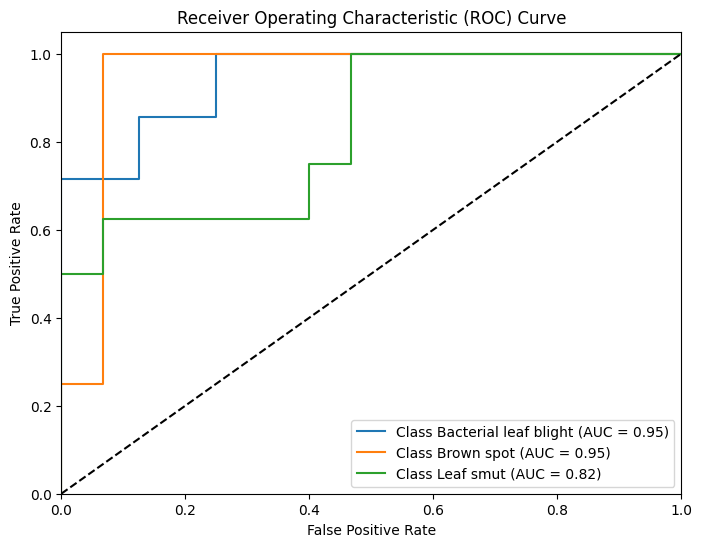

,Name,Accuracy,Recall,Precision,F1,TrainingTime
0,VIT,0.782609,0.791667,0.779762,0.783333,229.498509
1,Googlenet,0.478261,0.482143,0.495370,0.486991,239.299013
2,VGG16,0.565217,0.577381,0.576720,0.575910,258.398840
3,Alexnet,0.782609,0.785714,0.779762,0.780556,206.479867


In [ ]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=False)
alexnet.classifier[-1] = nn.Linear(4096, len(classes))
df=train_test_model(alexnet,"Alexnet",df,trainloader,testloader,epochs)
df.head()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Resnet50 traning started.


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 100/100 [04:23<00:00,  2.64s/it]


Testing started.


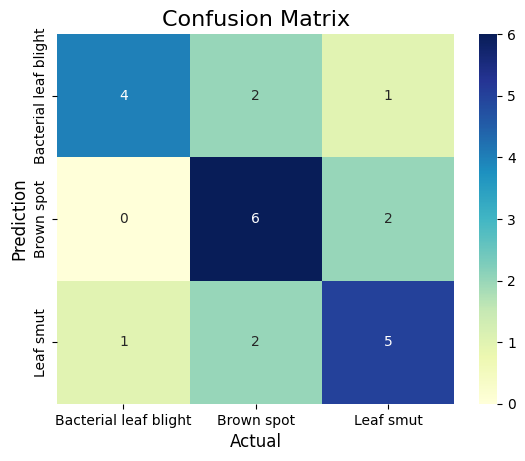

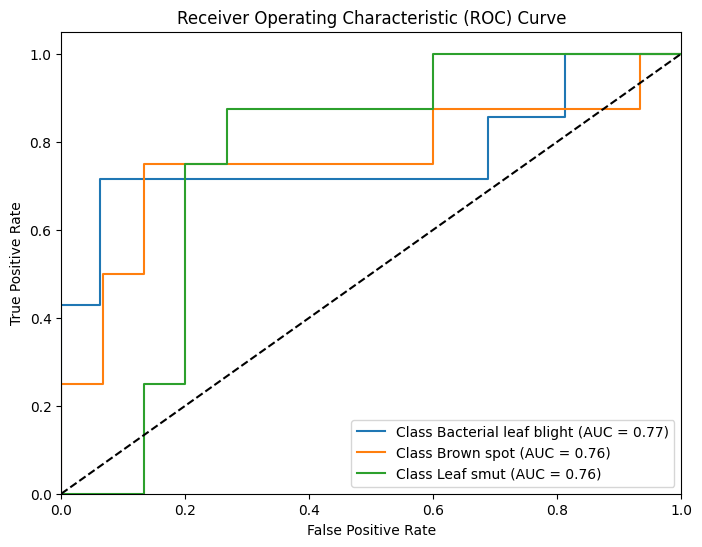

,Name,Accuracy,Recall,Precision,F1,TrainingTime
0,VIT,0.782609,0.791667,0.779762,0.783333,229.498509
1,Googlenet,0.478261,0.482143,0.495370,0.486991,239.299013
2,VGG16,0.565217,0.577381,0.576720,0.575910,258.398840
3,Alexnet,0.782609,0.785714,0.779762,0.780556,206.479867
4,Resnet50,0.652174,0.648810,0.675000,0.652778,263.896117


In [ ]:
import torchvision.models as models
resnet = models.resnet50(pretrained=False)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, len(classes))
df=train_test_model(resnet,"Resnet50",df,trainloader,testloader,epochs)
df.head()